In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loguru import logger
import numpy as np
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

from pathlib import Path

In [3]:
file_path = (
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811.csv"
)

df_exo = pd.read_csv(file_path)

df_fake = pd.read_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250813_plus_famous_fakes.csv"
)
df_exo = pd.concat([df_exo, df_fake], ignore_index=True)

print(df_exo.hostname.unique())
print(df_exo.hostname.nunique())

print(df_exo.groupby("sy_pnum").hostname.nunique())

['WASP-84' 'TOI-1136' 'TOI-5398' 'WASP-47' 'TOI-2076' 'TOI-942' 'HD 3167'
 'Kepler-56' 'WASP-148' 'TOI-451' 'K2-290' 'Kepler-462' 'SS' 'TOI-2202'
 'HD 118203' 'HIP 41378' 'TOI-421' 'AU Mic' '55 Cncx' 'GJ 876x'
 'HD 110067x' 'HD 191939x' 'KOI-351x' 'TOI-942x' 'TOI-942xx' 'TOI-942xxx'
 'TRAPPIST-1x' 'SSE' 'SSEn' 'K2-290l' 'Kepler-462l']
31
sy_pnum
2    15
3     3
4     3
5     2
6     3
7     1
8     4
Name: hostname, dtype: int64


In [4]:
df_interp = interp_db(
    df=df_exo, out_path=Path(file_path).parent / "custom_db_20250811_interp_plus_lambda.csv"
)

2025-09-10 10:50:47.120 | INFO     | exonamd.run:interp_db:173 - Thinning down the data with nanmedian
2025-09-10 10:50:47.123 | WARNING  | exonamd.run:interp_db:176 - NaT values in rowupdate: 87
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(
2025-09-10 10:50:47.159 | INFO     | exonamd.run:interp_db:185 - Data thinned down
2025-09-10 10:50:47.160 | INFO     | exonamd.run:interp_db:187 - Checking for duplicates
2025-09-10 10:50:47.167 | INFO     | exonamd.run:interp_db:195 - No duplicates found
2025-09-10 10:50:47.168 | INFO     | exonamd.run:interp_db:197 - Instantiating the flags
2025-09-10 10:50:47.169 | INFO     | exonamd.run:interp_db:199 - Flags instantiated
2025-09-10 10:50:47.170 | INFO     | exonamd.run:interp_db:201 - Interpolating missing eccentrici

Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

2025-09-10 10:50:47.278 | INFO     | exonamd.run:interp_db:210 - Values interpolated
2025-09-10 10:50:47.280 | INFO     | exonamd.run:interp_db:212 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

2025-09-10 10:50:49.163 | INFO     | exonamd.run:interp_db:221 - Values interpolated
2025-09-10 10:50:49.165 | DEBUG    | exonamd.run:interp_db:223 - Dropping columns that are no longer needed
2025-09-10 10:50:49.167 | DEBUG    | exonamd.run:interp_db:225 - Columns dropped
2025-09-10 10:50:49.168 | INFO     | exonamd.run:interp_db:227 - Removing systems where at least one planet has no mass or semi-major axis
2025-09-10 10:50:49.198 | INFO     | exonamd.run:interp_db:236 - Removing 1 systems: ['KOI-351x']
2025-09-10 10:50:49.200 | INFO     | exonamd.run:interp_db:238 - Systems removed
2025-09-10 10:50:49.201 | INFO     | exonamd.run:interp_db:240 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-09-10 10:50:49.485 | INFO     | exonamd.run:interp_db:249 - Values interpolated
2025-09-10 10:50:49.487 | INFO     | exonamd.run:interp_db:251 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-09-10 10:50:49.562 | INFO     | exonamd.run:interp_db:259 - Values interpolated
2025-09-10 10:50:49.564 | INFO     | exonamd.run:interp_db:262 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-09-10 10:50:49.846 | INFO     | exonamd.run:interp_db:270 - Values computed
2025-09-10 10:50:49.847 | INFO     | exonamd.run:interp_db:272 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-09-10 10:50:50.223 | INFO     | exonamd.run:interp_db:281 - Values interpolated
2025-09-10 10:50:50.226 | INFO     | exonamd.run:interp_db:284 - Storing the curated+interpolated database
2025-09-10 10:50:50.236 | INFO     | exonamd.run:interp_db:289 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_interp_plus_lambda.csv


2025-09-10 10:50:50.417 | DEBUG    | exonamd.run:calc_namd:334 - Dropping columns that are no longer needed
2025-09-10 10:50:50.420 | DEBUG    | exonamd.run:calc_namd:336 - Columns dropped
2025-09-10 10:50:50.421 | INFO     | exonamd.run:calc_namd:345 - Computing the relative NAMD


2025-09-10 10:50:50.535 | INFO     | exonamd.run:calc_namd:353 - Relative NAMD computed
2025-09-10 10:50:50.537 | INFO     | exonamd.run:calc_namd:356 - Computing the absolute NAMD
2025-09-10 10:50:50.647 | INFO     | exonamd.run:calc_namd:364 - Absolute NAMD computed
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(
2025-09-10 10:50:50.748 | INFO     | exonamd.run:calc_namd:444 - Computing the Monte Carlo relative NAMD
2025-09-10 10:50:56.947 | INFO     | exonamd.run:calc_namd:455 - Relative NAMD computed
2025-09-10 10:50:56.952 | INFO     | exonamd.run:calc_namd:458 - Computing the Monte Carlo absolute NAMD
2025-09-10 10:51:02.278 | INFO     | exonamd.run:calc_namd:469 - Absolute NAMD computed
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swi

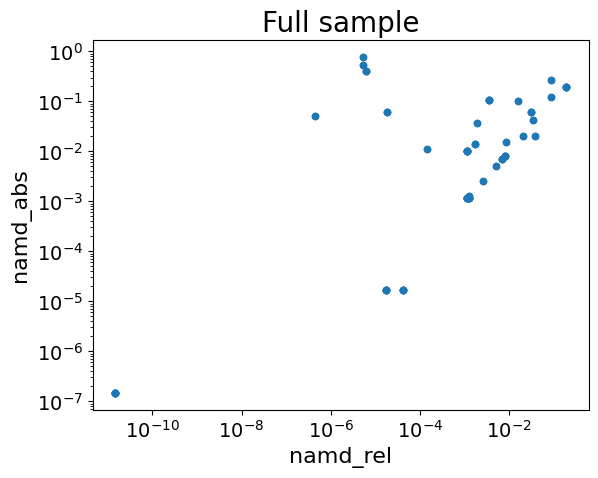

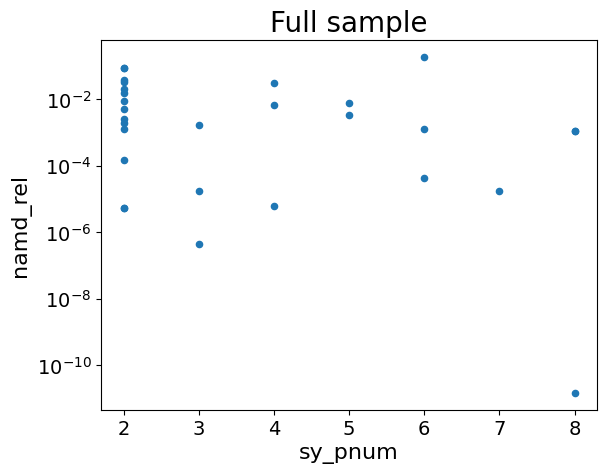

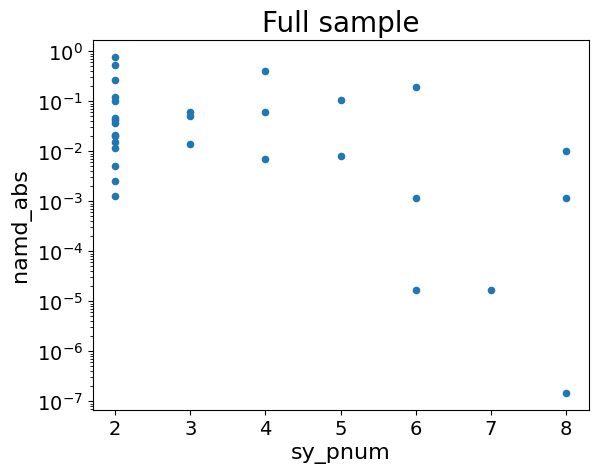

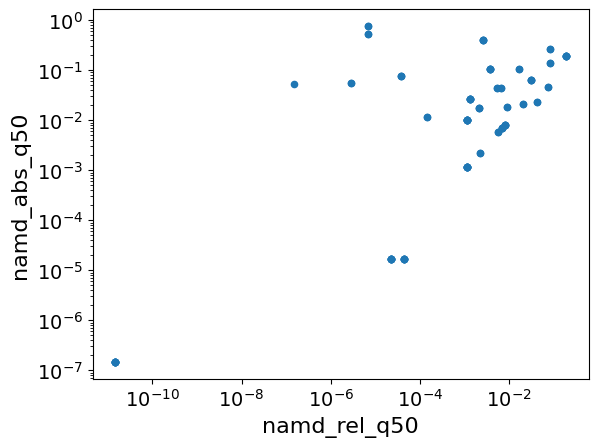

In [5]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=False,
    filt=None,
    # which=["rel"],
    # which=["abs"],
    which=["rel", "abs"],
    threshold=100,
    # use_trunc_normal=False,
    use_trunc_normal=True,
    Npt=int(1e5),
)

2025-09-10 10:51:05.112 | INFO     | __main__:<module>:33 - Selecting the host: K2-290
2025-09-10 10:51:05.115 | INFO     | __main__:<module>:35 - Host selected
2025-09-10 10:51:05.117 | INFO     | __main__:<module>:37 - Computing the Monte Carlo relative NAMD


2025-09-10 10:51:05.211 | INFO     | __main__:<module>:46 - Values computed
2025-09-10 10:51:05.215 | INFO     | __main__:<module>:56 - Plotting the relative NAMD distribution


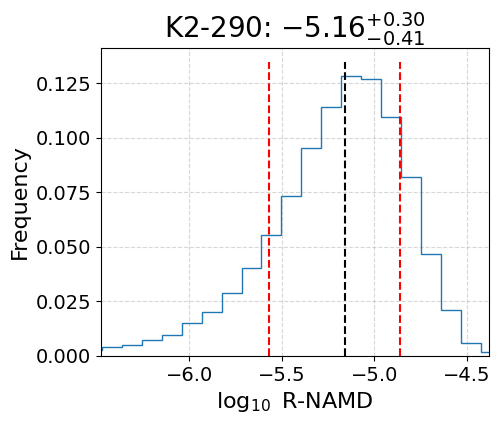

2025-09-10 10:51:05.639 | INFO     | __main__:<module>:69 - Plot done
2025-09-10 10:51:05.641 | INFO     | __main__:<module>:33 - Selecting the host: K2-290l
2025-09-10 10:51:05.644 | INFO     | __main__:<module>:35 - Host selected
2025-09-10 10:51:05.645 | INFO     | __main__:<module>:37 - Computing the Monte Carlo relative NAMD
2025-09-10 10:51:05.744 | INFO     | __main__:<module>:46 - Values computed
2025-09-10 10:51:05.747 | INFO     | __main__:<module>:56 - Plotting the relative NAMD distribution


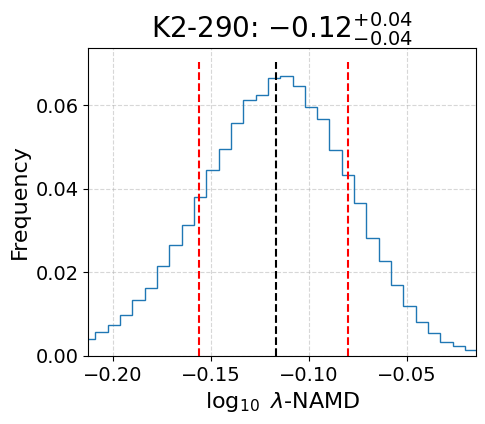

2025-09-10 10:51:06.040 | INFO     | __main__:<module>:69 - Plot done
2025-09-10 10:51:06.041 | INFO     | __main__:<module>:33 - Selecting the host: K2-290
2025-09-10 10:51:06.044 | INFO     | __main__:<module>:35 - Host selected
2025-09-10 10:51:06.045 | INFO     | __main__:<module>:37 - Computing the Monte Carlo relative NAMD
2025-09-10 10:51:06.138 | INFO     | __main__:<module>:46 - Values computed
2025-09-10 10:51:06.142 | INFO     | __main__:<module>:56 - Plotting the relative NAMD distribution


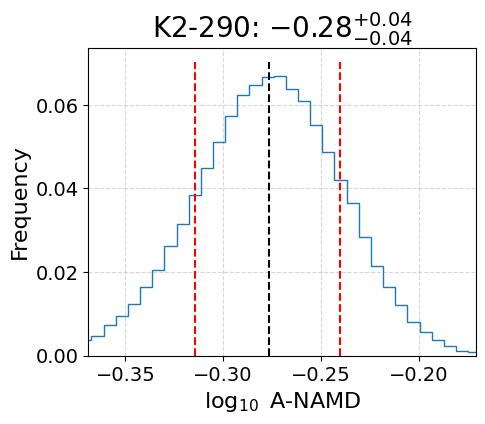

2025-09-10 10:51:06.420 | INFO     | __main__:<module>:69 - Plot done
2025-09-10 10:51:06.421 | INFO     | __main__:<module>:33 - Selecting the host: Kepler-462
2025-09-10 10:51:06.424 | INFO     | __main__:<module>:35 - Host selected
2025-09-10 10:51:06.425 | INFO     | __main__:<module>:37 - Computing the Monte Carlo relative NAMD
2025-09-10 10:51:06.518 | INFO     | __main__:<module>:46 - Values computed
2025-09-10 10:51:06.522 | INFO     | __main__:<module>:56 - Plotting the relative NAMD distribution


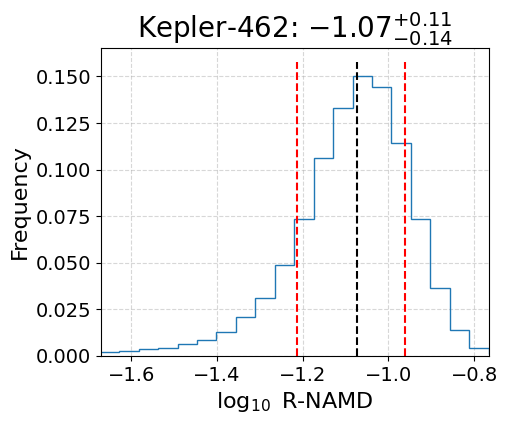

2025-09-10 10:51:06.840 | INFO     | __main__:<module>:69 - Plot done
2025-09-10 10:51:06.842 | INFO     | __main__:<module>:33 - Selecting the host: Kepler-462l
2025-09-10 10:51:06.844 | INFO     | __main__:<module>:35 - Host selected
2025-09-10 10:51:06.845 | INFO     | __main__:<module>:37 - Computing the Monte Carlo relative NAMD
2025-09-10 10:51:06.947 | INFO     | __main__:<module>:46 - Values computed
2025-09-10 10:51:06.951 | INFO     | __main__:<module>:56 - Plotting the relative NAMD distribution


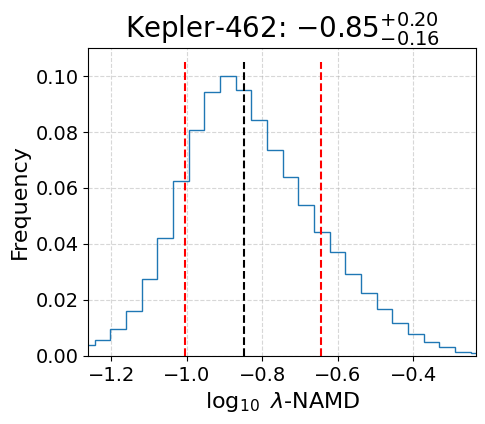

2025-09-10 10:51:07.270 | INFO     | __main__:<module>:69 - Plot done
2025-09-10 10:51:07.271 | INFO     | __main__:<module>:33 - Selecting the host: Kepler-462
2025-09-10 10:51:07.275 | INFO     | __main__:<module>:35 - Host selected
2025-09-10 10:51:07.275 | INFO     | __main__:<module>:37 - Computing the Monte Carlo relative NAMD
2025-09-10 10:51:07.375 | INFO     | __main__:<module>:46 - Values computed
2025-09-10 10:51:07.378 | INFO     | __main__:<module>:56 - Plotting the relative NAMD distribution


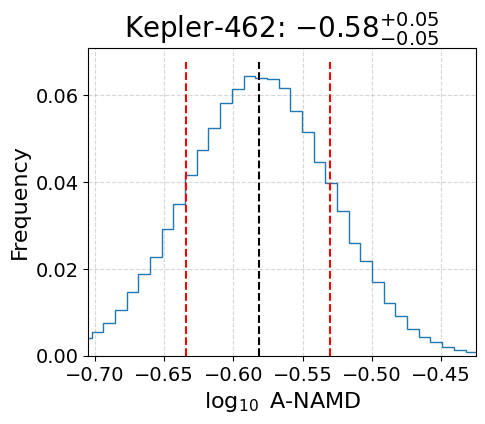

2025-09-10 10:51:07.674 | INFO     | __main__:<module>:69 - Plot done


In [6]:
# Task 1: sample the NAMD for a given host
# hostname = "K2-290"
# hostname = "K2-290l"
# hostname = "Kepler-462"
# hostname = "Kepler-462l"
# kind = "abs"
# kind = "rel"


cases = [
    ("K2-290", "K2-290", "rel", rf"R-NAMD", "K2-290_rel", (1.0, 99.9)),
    ("K2-290l", "K2-290", "abs", rf"$\lambda$-NAMD", "K2-290_lam", (1.0, 99.9)),
    ("K2-290", "K2-290", "abs", rf"A-NAMD", "K2-290_abs", (1.0, 99.9)),
    ("Kepler-462", "Kepler-462", "rel", rf"R-NAMD", "Kepler-462_rel", (1.0, 99.9)),
    (
        "Kepler-462l",
        "Kepler-462",
        "abs",
        rf"$\lambda$-NAMD",
        "Kepler-462_lam",
        (1.0, 99.9),
    ),
    ("Kepler-462", "Kepler-462", "abs", rf"A-NAMD", "Kepler-462_abs", (1.0, 99.9)),
]

Npt = int(1e5)
threshold = 100
scale = "log"  # "linear" or "log"

for case in cases:
    hostname, star, kind, xlabel, plot_name, xlim = case

    logger.info(f"Selecting the host: {hostname}")
    host = df_namd[df_namd["hostname"] == hostname]
    logger.info("Host selected")

    logger.info("Computing the Monte Carlo relative NAMD")
    retval = solve_namd_mc(
        host=host,
        kind=f"{kind}",
        Npt=Npt,
        threshold=threshold,
        full=True,
        use_trunc_normal=True,
    )
    logger.info("Values computed")

    mc_values = (
        np.log10(retval[f"namd_{kind}_mc"])
        if scale == "log"
        else retval[f"namd_{kind}_mc"]
    )
    xlim = np.percentile(mc_values, xlim)

    # Task 2: plot the NAMD for a given host
    logger.info("Plotting the relative NAMD distribution")
    simple_plot(
        df=retval,
        kind=f"{kind}",
        # title=hostname,
        title=star,
        which="namd",
        scale=scale,
        xlabel=xlabel,
        out_path=f"/home/ariel/andrea.bocchieri/DATA/ExoNAMD/notebook/plots/{plot_name}_paper.pdf",
        figsize=(5, 4),
        xlim=xlim,
    )
    logger.info("Plot done")